In [39]:
%pylab inline

import os
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from __future__ import print_function
from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential    # Importing Sequential Model
from keras.layers.core import Dense,Dropout, Activation  #  Importing  Dense Layers,Dropouts and Activation functions
from keras.optimizers import RMSprop, Adam
from keras.utils import np_utils  
np.random.seed(1671) # for reproducibility -> Once you put the same seed you get same patterns of random numbers.


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['seed', 'imread', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [40]:
root_dir = os.path.abspath('../..')

# check for existence
print(os.path.exists(root_dir))
print(root_dir)

data_dir = os.path.join(root_dir,'1_Neural_Network_Foundations','Analytics_Vidya_Identify_The_Digits')
print(os.path.exists(data_dir))
print(data_dir)

sub_dir = os.path.join(data_dir,'sub') 
print(os.path.exists(sub_dir))
print(sub_dir)

True
C:\Users\Dinesh\Desktop\Deep-Learning-with-keras
True
C:\Users\Dinesh\Desktop\Deep-Learning-with-keras\1_Neural_Network_Foundations\Analytics_Vidya_Identify_The_Digits
True
C:\Users\Dinesh\Desktop\Deep-Learning-with-keras\1_Neural_Network_Foundations\Analytics_Vidya_Identify_The_Digits\sub


In [41]:
train = pd.read_csv(os.path.join(data_dir,'data','Train', 'train.csv'))
test = pd.read_csv(os.path.join('test.csv'))

In [42]:
sample_submission = pd.read_csv(os.path.join('Sample_Submission.csv'))

In [43]:
temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

In [44]:
print(train_x)

[[[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 ..., 
 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  

In [45]:
print(train_x.shape)

(49000, 28, 28)


In [46]:
train_x /= 255.0 
train_x = train_x.reshape(-1, 784).astype('float32')
print(train_x.shape)

(49000, 784)


In [47]:
temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

In [48]:
print(test_x.shape)

(21000, 784)


In [49]:
train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [50]:
print(train_y)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]]


In [51]:
# network and training
NB_EPOCH = 50 # 30-> times the model is exposed to the training set.
BATCH_SIZE = 300
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = Adam()
N_HIDDEN = 128 # Neurons
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

In [52]:
# Final hidden layer  with 10 outputs
# final stage is softmax
model = Sequential() # Sequential Model.
model.add(Dense(N_HIDDEN, input_shape=(784,))) # 1st Hidden Layer --> 128 neurons and input dimension ->784
model.add(Activation('relu')) # Activation function for 1st Hidden Layer
model.add(Dropout(DROPOUT))

model.add(Dense(N_HIDDEN))  # 2nd Hidden Layer --> 128 neurons
model.add(Activation('relu')) # Activation function for 2nd Hidden Layer
model.add(Dropout(DROPOUT))


model.add(Dense(NB_CLASSES)) # Final layer with 10 neurons == > no of outputs
model.add(Activation('softmax')) # Final layer activation will be 'softmax'

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
__________

In [53]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [54]:
# Training a model in keras

# Once the model is compiled it can be trained with the fit() function

history = model.fit(train_x, train_y,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 39200 samples, validate on 9800 samples
Epoch 1/50
39200/39200 [==============================] - 2s 46us/step - loss: 0.7363 - acc: 0.7747 - val_loss: 0.2775 - val_acc: 0.9194
Epoch 2/50
39200/39200 [==============================] - 2s 38us/step - loss: 0.3051 - acc: 0.9091 - val_loss: 0.2005 - val_acc: 0.9401
Epoch 3/50
39200/39200 [==============================] - 2s 38us/step - loss: 0.2305 - acc: 0.9302 - val_loss: 0.1597 - val_acc: 0.9505
Epoch 4/50
39200/39200 [==============================] - 2s 39us/step - loss: 0.1906 - acc: 0.9436 - val_loss: 0.1351 - val_acc: 0.9586
Epoch 5/50
39200/39200 [==============================] - 2s 38us/step - loss: 0.1656 - acc: 0.9505 - val_loss: 0.1215 - val_acc: 0.9623
Epoch 6/50
39200/39200 [==============================] - 2s 38us/step - loss: 0.1475 - acc: 0.9554 - val_loss: 0.1127 - val_acc: 0.9644
Epoch 7/50
39200/39200 [==============================] - 2s 38us/step - loss: 0.1338 - acc: 0.9595 - val_loss: 0.1064 - val_acc:

In [55]:
pred = model.predict_classes(test_x)
print(pred)

21000/21000 [==============================] - 1s 32us/step
[4 0 4 ..., 6 6 2]


Prediction is:  2


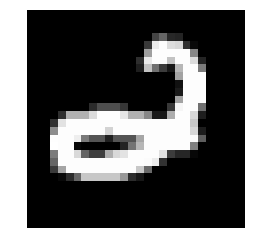

In [56]:

img_name = rng.choice(test.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)

img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - train.shape[0]

print("Prediction is: ", pred[test_index])

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [57]:
sample_submission.filename = test.filename; sample_submission.label = pred
print(sample_submission.head(n=5))

    filename  label
0  49000.png      4
1  49001.png      0
2  49002.png      4
3  49003.png      7
4  49004.png      9


In [58]:
sample_submission.to_csv(os.path.join(sub_dir, 'sub10.csv'), index=False)